In [1]:
from utils import NUFeature_standard_suite
import utils
from neuronunit.optimisation.optimization_management import check_bin_vm30, check_bin_vm15

In [2]:
from make_allen_tests_from_id import *
import make_allen_tests_from_id 

specimen_id = 324257146
#import allen_data_driven

In [3]:
#import allen_data_driven
#
sweep_numbers,data_set,sweeps = make_allen_tests_from_id.allen_id_to_sweeps(specimen_id)

import efel
simple_yes_list = list(efel.getFeatureNames())


In [4]:
#sweep_numbers,data_set,sweeps 
#simple_yes_list

In [5]:
vm15,vm30,rheobase,currents,vmrh = make_allen_tests_from_id.get_model_parts(data_set,
                                                                            sweep_numbers,
                                                                            specimen_id)
suite,specimen_id = make_allen_tests_from_id.make_suite_from_static_models(vm15,vm30,rheobase,currents,vmrh,specimen_id)
with open(str(specimen_id)+'later_allen_NU_tests.p','wb') as f:
    pickle.dump(suite,f)


12
41
77
87
89
89


In [6]:
suite

In [7]:
 suite.traces

{'rh_current': 5e-11,
 'vmrh': AnalogSignal with 1 channels of length 668571; units mV; datatype float64 
 sampling rate: 200000.0 Hz
 time: 0.0 s to 3.342855 s,
 'vm15': AnalogSignal with 1 channels of length 668571; units mV; datatype float64 
 sampling rate: 200000.0 Hz
 time: 0.0 s to 3.342855 s}

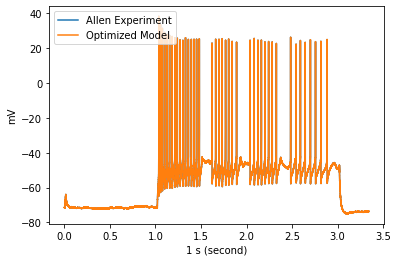

In [8]:
specific_filter_list = ['ISI_log_slope_1.5x','mean_frequency_1.5x','adaptation_index2_1.5x','first_isi_1.5x','ISI_CV_1.5x','median_isi_1.5x','AHP_depth_abs_1.5x','sag_ratio2_1.5x','ohmic_input_resistance_1.5x','sag_ratio2_1.5x','peak_voltage_1.5x','voltage_base_1.5x','Spikecount_1.5x']#,'Spikecount_3.0x']


target = StaticModel(vm=suite.traces['vmrh']) #DataTC(backend="ADEXP")
target.vm15 = suite.traces['vm15']

nu_tests = suite.tests;
check_bin_vm15(target,target)


In [9]:
for t in suite.tests:
    print(t.name)

AHP_depth_1.5x
AHP_depth_abs_1.5x
AP_amplitude_1.5x
ISI_values_1.5x
Spikecount_1.5x
adaptation_index_1.5x
adaptation_index2_1.5x
all_ISI_values_1.5x
mean_AP_amplitude_1.5x
min_voltage_between_spikes_1.5x
minimum_voltage_1.5x
peak_voltage_1.5x
spike_half_width_1.5x
time_to_first_spike_1.5x
time_to_last_spike_1.5x
time_to_second_spike_1.5x
trace_check_1.5x
voltage_base_1.5x


In [10]:
#simple_yes_list

In [11]:
from for_thesis import instance_opt

In [12]:
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
MODEL_PARAMS['IZHI'] = { k:sorted(v) for k,v in MODEL_PARAMS['IZHI'].items() }
from bluepyopt.ephys.models import ReducedCellModel
from bluepyopt.parameters import Parameter


In [13]:
from bluepyopt.ephys.models import ReducedCellModel
from bluepyopt import ephys#.models import ReducedCellModel

def make_evaluator(nu_tests,
                    MODEL_PARAMS,
                    experiment=str('Neocortex pyramidal cell layer 5-6'),
                    model=str('ADEXP')):
    objectives = []


    #nu_tests[0].score_type = ZScore
    simple_cell = ReducedCellModel(
        name='simple_cell',
        params=MODEL_PARAMS[model],backend=model)  

    simple_cell.backend = model
    simple_cell.params = {k:np.mean(v) for k,v in simple_cell.params.items() }

    lop={}
    for k,v in MODEL_PARAMS[model].items():
        p = Parameter(name=k,bounds=v,frozen=False)
        lop[k] = p

    simple_cell.params = lop

    for tt in nu_tests:
        feature_name = tt.name
        ft = NUFeature_standard_suite(tt,simple_cell)
        objective = ephys.objectives.SingletonObjective(
            feature_name,
            ft)
        objectives.append(objective)

    score_calc = ephys.objectivescalculators.ObjectivesCalculator(objectives) 


    sweep_protocols = []
    for protocol_name, amplitude in [('step1', 0.05)]:
        protocol = ephys.protocols.SweepProtocol(protocol_name, [None], [None])
        sweep_protocols.append(protocol)
    twostep_protocol = ephys.protocols.SequenceProtocol('twostep', protocols=sweep_protocols)

    cell_evaluator = ephys.evaluators.CellEvaluator(
            cell_model=simple_cell,
            param_names=MODEL_PARAMS[model].keys(),
            fitness_protocols={twostep_protocol.name: twostep_protocol},
            fitness_calculator=score_calc,
            sim='euler')
    simple_cell.params_by_names(MODEL_PARAMS[model].keys())
    return cell_evaluator, simple_cell, score_calc , [tt.name for tt in nu_tests]



In [14]:
cell_evaluator, simple_cell, score_calc, test_names = make_evaluator(
                                                        suite.tests,
                                                        MODEL_PARAMS,
                                                        suite.tests,
                                                        model='IZHI')
#cell_evaluator, simple_cell, score_calc = make_evaluator(cells,MODEL_PARAMS)

#MU =10
import bluepyopt as bpop
mut = 0.05
cxp = 0.4
MU = 10
NGEN = 10

optimisation = bpop.optimisations.DEAPOptimisation(
      evaluator=cell_evaluator,
      offspring_size = MU,
      map_function = utils.dask_map_function,
      selector_name='IBEA',
      mutpb=mut,
      cxpb=cxp)

final_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=NGEN)
best_ind = hall_of_fame[0]


falls through 


falls through 




falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 


falls through 




falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 





falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 


falls through 


falls through 





falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 


falls through 




falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 


falls through 




falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls through 



falls thro

In [15]:
best_ind = hall_of_fame[0]
